In [4]:
import ee
import geemap


Map(center=[37.74998247499825, -122.2499999999997], controls=(WidgetControl(options=['position', 'transparent_…

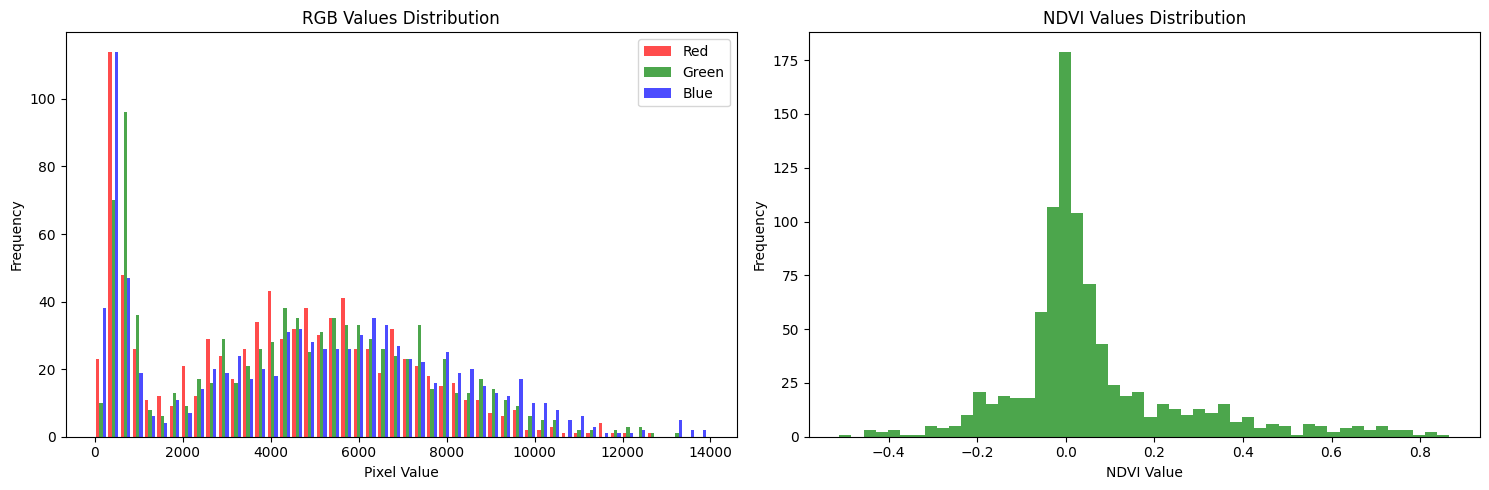

RGB Statistics:
Red: Mean = 4181.44, Std = 2776.11
Green: Mean = 4511.38, Std = 2941.94
Blue: Mean = 4766.60, Std = 3245.31

NDVI Statistics:
Mean = 0.06, Std = 0.20
Min = -0.51, Max = 0.87
25th percentile = -0.03
50th percentile (median) = 0.01
75th percentile = 0.09


In [11]:
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np

# Initialize Earth Engine
ee.Initialize()

# Define a region of interest (ROI) - replace with your area of interest
roi = ee.Geometry.Rectangle([-122.5, 37.5, -122.0, 38.0])  # San Francisco Bay Area

# Function to add NDVI band
def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Function to mask clouds using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(
           qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask.Not())  # Invert mask to keep cloudy pixels

# Get Sentinel-2 collection
s2 = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(roi) \
    .filterDate('2022-01-01', '2022-12-31') \
    .filter(ee.Filter.gt('CLOUDY_PIXEL_PERCENTAGE', 20))  # Filter for cloudy images

# Add NDVI band and apply cloud masking
s2 = s2.map(addNDVI).map(maskS2clouds)

# Get the median composite
composite = s2.median()

# Create a map
Map = geemap.Map()
Map.centerObject(roi, 10)

# Add RGB layer
rgb_vis = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}
Map.addLayer(composite, rgb_vis, 'RGB')

# Add NDVI layer
ndvi_vis = {'min': -1, 'max': 1, 'palette': ['blue', 'white', 'green']}
Map.addLayer(composite.select('NDVI'), ndvi_vis, 'NDVI')

# Display the map
display(Map)

# Sample points for pixel analysis
num_points = 1000
points = ee.FeatureCollection.randomPoints(roi, num_points)

# Get values at points
samples = composite.select(['B4', 'B3', 'B2', 'NDVI']).sampleRegions(
    collection=points,
    scale=10,
    geometries=True
)

# Get the data as a list
data = samples.getInfo()['features']

# Extract RGB and NDVI values
rgb_values = np.array([[f['properties']['B4'], f['properties']['B3'], f['properties']['B2']] for f in data])
ndvi_values = np.array([f['properties']['NDVI'] for f in data])

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# RGB histogram
ax1.hist(rgb_values, bins=50, label=['Red', 'Green', 'Blue'], color=['red', 'green', 'blue'], alpha=0.7)
ax1.set_title('RGB Values Distribution')
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Frequency')
ax1.legend()

# NDVI histogram
ax2.hist(ndvi_values, bins=50, color='green', alpha=0.7)
ax2.set_title('NDVI Values Distribution')
ax2.set_xlabel('NDVI Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print statistics
print("RGB Statistics:")
print(f"Red: Mean = {np.mean(rgb_values[:, 0]):.2f}, Std = {np.std(rgb_values[:, 0]):.2f}")
print(f"Green: Mean = {np.mean(rgb_values[:, 1]):.2f}, Std = {np.std(rgb_values[:, 1]):.2f}")
print(f"Blue: Mean = {np.mean(rgb_values[:, 2]):.2f}, Std = {np.std(rgb_values[:, 2]):.2f}")

print("\nNDVI Statistics:")
print(f"Mean = {np.mean(ndvi_values):.2f}, Std = {np.std(ndvi_values):.2f}")
print(f"Min = {np.min(ndvi_values):.2f}, Max = {np.max(ndvi_values):.2f}")
print(f"25th percentile = {np.percentile(ndvi_values, 25):.2f}")
print(f"50th percentile (median) = {np.percentile(ndvi_values, 50):.2f}")
print(f"75th percentile = {np.percentile(ndvi_values, 75):.2f}")

Map(center=[37.74998247499825, -122.2499999999997], controls=(WidgetControl(options=['position', 'transparent_…

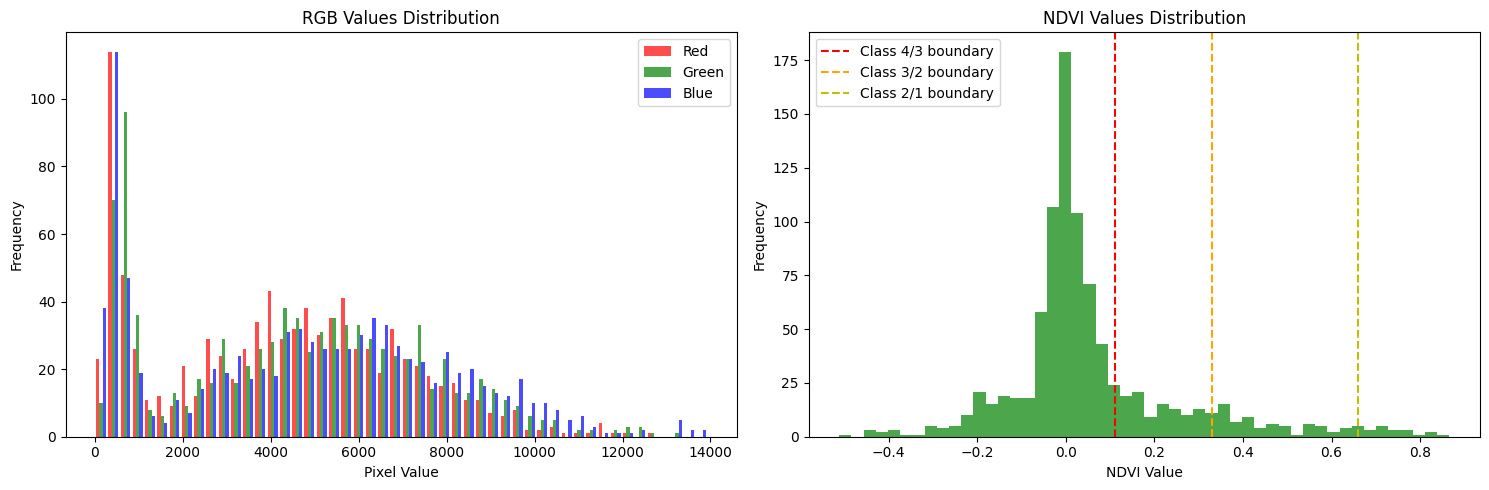

RGB Statistics:
Red: Mean = 4181.44, Std = 2776.11
Green: Mean = 4511.38, Std = 2941.94
Blue: Mean = 4766.60, Std = 3245.31

NDVI Statistics:
Mean = 0.06, Std = 0.20
Min = -0.51, Max = 0.87
25th percentile = -0.03
50th percentile (median) = 0.01
75th percentile = 0.09

NDVI Classification Statistics:
Class 4 (None): 77.58%
Class 3 (Low): 12.53%
Class 2 (Moderate): 7.69%
Class 1 (High): 2.20%


In [12]:
import ee
import geemap
import matplotlib.pyplot as plt
import numpy as np

# Initialize Earth Engine
ee.Initialize()

# Define a region of interest (ROI) - replace with your area of interest
roi = ee.Geometry.Rectangle([-122.5, 37.5, -122.0, 38.0])  # San Francisco Bay Area

# Function to add NDVI band
def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

# Function to mask clouds using the QA60 band
def maskS2clouds(image):
    qa = image.select('QA60')
    cloudBitMask = 1 << 10
    cirrusBitMask = 1 << 11
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(
           qa.bitwiseAnd(cirrusBitMask).eq(0))
    return image.updateMask(mask.Not())  # Invert mask to keep cloudy pixels

# Get Sentinel-2 collection
s2 = ee.ImageCollection('COPERNICUS/S2_SR') \
    .filterBounds(roi) \
    .filterDate('2022-01-01', '2022-12-31') \
    .filter(ee.Filter.gt('CLOUDY_PIXEL_PERCENTAGE', 20))  # Filter for cloudy images

# Add NDVI band and apply cloud masking
s2 = s2.map(addNDVI).map(maskS2clouds)

# Get the median composite
composite = s2.median()

# Create a map
Map = geemap.Map()
Map.centerObject(roi, 10)

# Add RGB layer
rgb_vis = {'bands': ['B4', 'B3', 'B2'], 'min': 0, 'max': 3000}
Map.addLayer(composite, rgb_vis, 'RGB')

# Add NDVI layer with new classification
ndvi_vis = {
    'min': -1, 
    'max': 1, 
    'palette': ['red', 'orange', 'yellow', 'green'],
    'bands': ['NDVI']
}

# Create a classified NDVI image
classified_ndvi = composite.select('NDVI').expression(
    '(b("NDVI") < 0.111) ? 0' +
    ': (b("NDVI") < 0.33) ? 1' +
    ': (b("NDVI") < 0.66) ? 2' +
    ': 3'
).int()

# Define the visualization parameters for the classified NDVI
classified_vis = {
    'min': 0,
    'max': 3,
    'palette': ['red', 'orange', 'yellow', 'green']
}

Map.addLayer(classified_ndvi, classified_vis, 'Classified NDVI')

# Add a legend
legend_dict = {
    'Class 4: None (NDVI < 0.111)': 'red',
    'Class 3: Low (0.111 ≤ NDVI < 0.33)': 'orange',
    'Class 2: Moderate (0.33 ≤ NDVI < 0.66)': 'yellow',
    'Class 1: High (NDVI ≥ 0.66)': 'green'
}
Map.add_legend(title="NDVI Classification", legend_dict=legend_dict)

# Display the map
display(Map)

# Sample points for pixel analysis
num_points = 1000
points = ee.FeatureCollection.randomPoints(roi, num_points)

# Get values at points
samples = composite.select(['B4', 'B3', 'B2', 'NDVI']).sampleRegions(
    collection=points,
    scale=10,
    geometries=True
)

# Get the data as a list
data = samples.getInfo()['features']

# Extract RGB and NDVI values
rgb_values = np.array([[f['properties']['B4'], f['properties']['B3'], f['properties']['B2']] for f in data])
ndvi_values = np.array([f['properties']['NDVI'] for f in data])

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# RGB histogram
ax1.hist(rgb_values, bins=50, label=['Red', 'Green', 'Blue'], color=['red', 'green', 'blue'], alpha=0.7)
ax1.set_title('RGB Values Distribution')
ax1.set_xlabel('Pixel Value')
ax1.set_ylabel('Frequency')
ax1.legend()

# NDVI histogram with new classification
ax2.hist(ndvi_values, bins=50, color='green', alpha=0.7)
ax2.set_title('NDVI Values Distribution')
ax2.set_xlabel('NDVI Value')
ax2.set_ylabel('Frequency')
ax2.axvline(0.111, color='r', linestyle='--', label='Class 4/3 boundary')
ax2.axvline(0.33, color='orange', linestyle='--', label='Class 3/2 boundary')
ax2.axvline(0.66, color='y', linestyle='--', label='Class 2/1 boundary')
ax2.legend()

plt.tight_layout()
plt.show()

# Print statistics
print("RGB Statistics:")
print(f"Red: Mean = {np.mean(rgb_values[:, 0]):.2f}, Std = {np.std(rgb_values[:, 0]):.2f}")
print(f"Green: Mean = {np.mean(rgb_values[:, 1]):.2f}, Std = {np.std(rgb_values[:, 1]):.2f}")
print(f"Blue: Mean = {np.mean(rgb_values[:, 2]):.2f}, Std = {np.std(rgb_values[:, 2]):.2f}")

print("\nNDVI Statistics:")
print(f"Mean = {np.mean(ndvi_values):.2f}, Std = {np.std(ndvi_values):.2f}")
print(f"Min = {np.min(ndvi_values):.2f}, Max = {np.max(ndvi_values):.2f}")
print(f"25th percentile = {np.percentile(ndvi_values, 25):.2f}")
print(f"50th percentile (median) = {np.percentile(ndvi_values, 50):.2f}")
print(f"75th percentile = {np.percentile(ndvi_values, 75):.2f}")

# Print NDVI classification statistics
print("\nNDVI Classification Statistics:")
print(f"Class 4 (None): {np.sum(ndvi_values < 0.111) / len(ndvi_values):.2%}")
print(f"Class 3 (Low): {np.sum((ndvi_values >= 0.111) & (ndvi_values < 0.33)) / len(ndvi_values):.2%}")
print(f"Class 2 (Moderate): {np.sum((ndvi_values >= 0.33) & (ndvi_values < 0.66)) / len(ndvi_values):.2%}")
print(f"Class 1 (High): {np.sum(ndvi_values >= 0.66) / len(ndvi_values):.2%}")